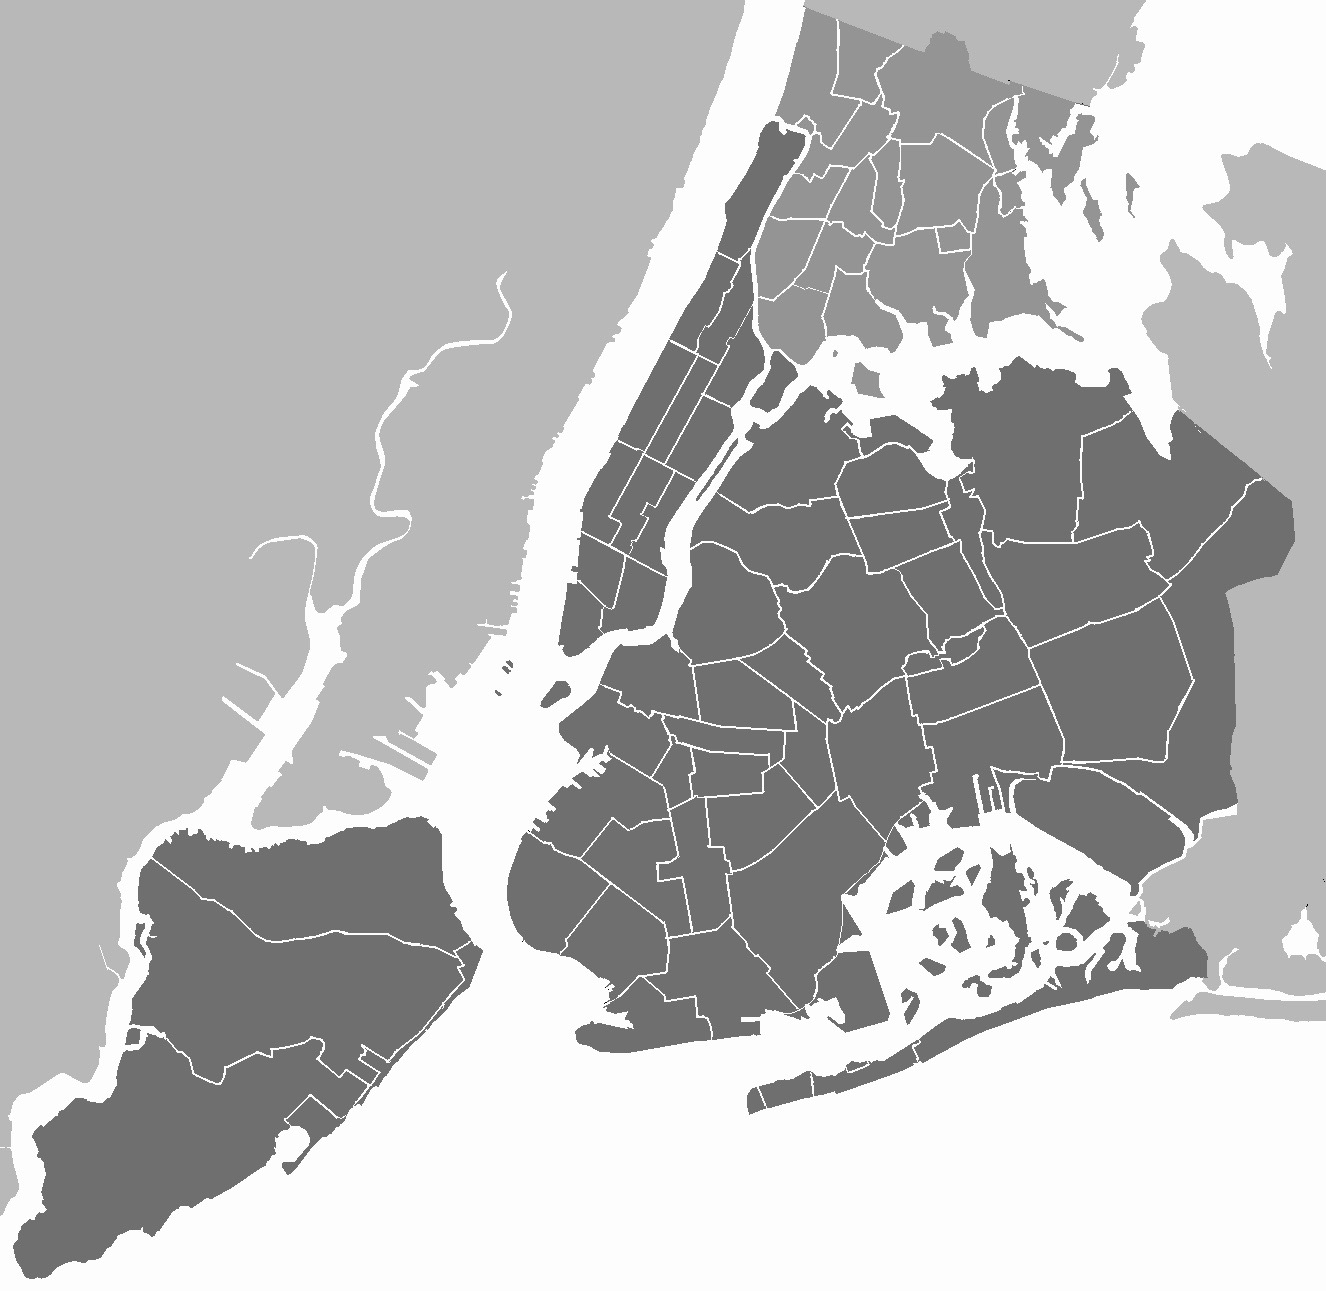

In [92]:
from IPython.display import Image
Image(filename='New_York_City_.png', width=1200, height=900)

### About Dataset

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.



This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

### Prepare The Dataset
    After loading the dataset in and from the head of AB_2019_NYC dataset we can see a number of things. These 16 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# let's load the data 
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# let's see the shape of the data
df.shape

(48895, 16)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
# let's check for the null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# let's check for the data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
# let's see the duplicates
df.duplicated().sum()

0

### Process The Data

In [8]:
# fill the reviews_per_month  with the mean
df.reviews_per_month.fillna(df.reviews_per_month.mean(), inplace=True)

In [10]:
# now let's drop the columns that we don't need

df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)



In [11]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [13]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:>

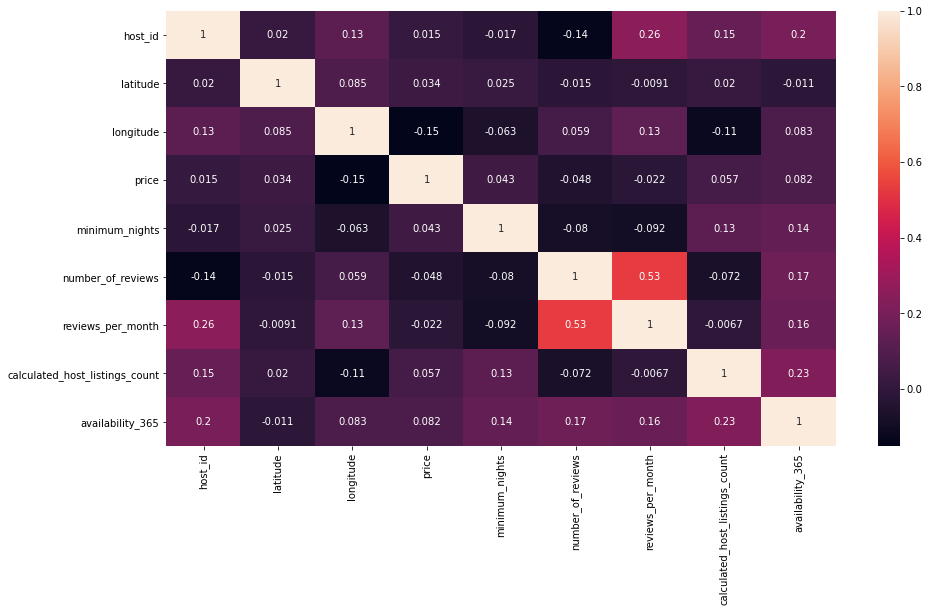

In [19]:
# let's see the correlation between the variables in a heatmap 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

as we can see the correlation between the variables are week

### Analyze The Data

In [21]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [22]:
# let's see the unique values in the neighbourhood_group column
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
# let's see the unique values in the neighbourhood column
len(df.neighbourhood.unique())

221

In [26]:
# let's discover which neighbourhood group is the most visited
df.groupby('neighbourhood_group').neighbourhood.count().sort_values(ascending=False).head(10)


neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood, dtype: int64

we see that Manhattan is the most visited neighborhood_group

In [27]:
# let's see the unique values in the room_type column
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 1.0, 'Count of room_type')

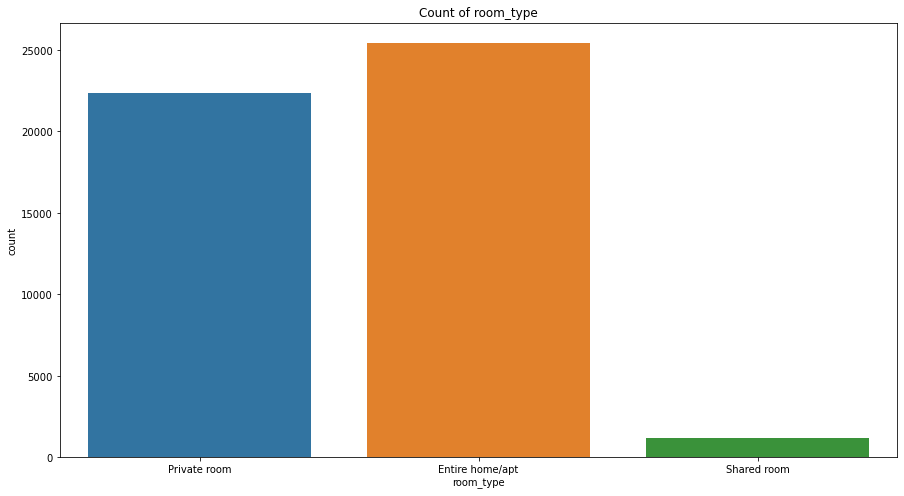

In [30]:
# let's see a count plot of the room_type column
plt.figure(figsize=(15,8))
sns.countplot(x='room_type', data=df)
plt.title('Count of room_type')

Text(0.5, 1.0, 'Count of neighbourhood_group')

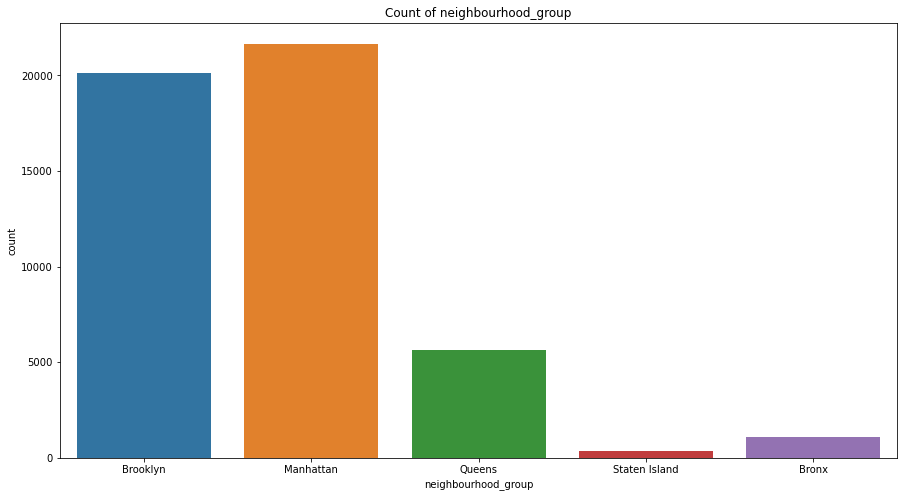

In [31]:
# let's see a count plot of the neighbourhood_group column
plt.figure(figsize=(15,8))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Count of neighbourhood_group')



In [44]:
top_neighbourhood = df.groupby('neighbourhood').reviews_per_month.mean().sort_values(ascending=False).head(10)
top_neighbourhood


neighbourhood
East Elmhurst          4.561919
Silver Lake            4.340000
Springfield Gardens    4.273954
Rosebank               3.812857
Huguenot               3.760000
Schuylerville          3.157692
South Ozone Park       3.088411
Jamaica Hills          3.072903
New Dorp Beach         3.023933
Queens Village         2.912870
Name: reviews_per_month, dtype: float64

Text(0.5, 1.0, 'Average reviews per month')

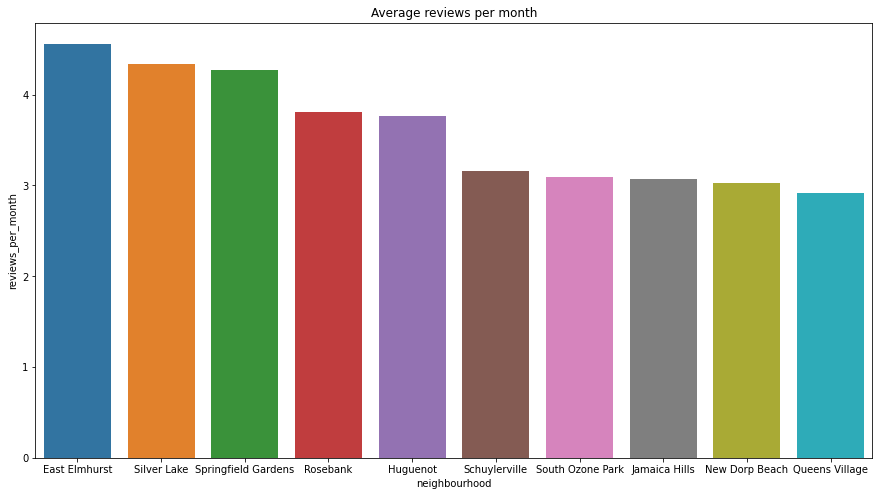

In [43]:
# let's see the top 10 neighbourhoods in terms of reviews in a bar plot
plt.figure(figsize=(15,8))
sns.barplot(x=top_neighbourhood.index, y=top_neighbourhood, data=df)
plt.title('Average reviews per month')


as we can see the most rated neighbourhood is the East Elmhurst

In [47]:
bad_neighbourhood = df.groupby('neighbourhood').reviews_per_month.mean().sort_values(ascending=True).head(10)
bad_neighbourhood


neighbourhood
Co-op City                    0.245000
West Farms                    0.395000
Bay Terrace, Staten Island    0.455000
Westerleigh                   0.505000
Howland Hook                  0.570000
Breezy Point                  0.604407
Eastchester                   0.667666
Oakwood                       0.714000
Little Neck                   0.749289
Spuyten Duyvil                0.755000
Name: reviews_per_month, dtype: float64

Text(0.5, 1.0, 'Average reviews per month')

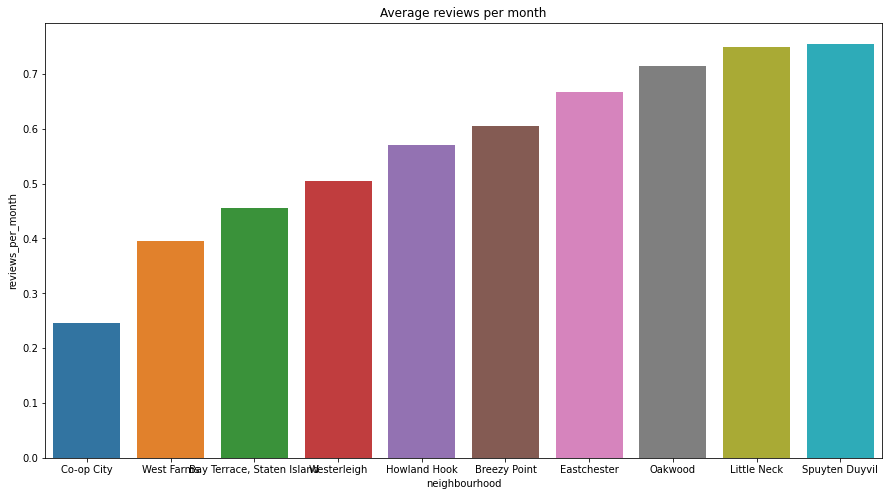

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x=bad_neighbourhood.index, y=bad_neighbourhood, data=df)
plt.title('Average reviews per month')


these are the neighbourhood that has bad rating

In [49]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [50]:
# let's discover the most neighbourhood_group that has the most availability_365
df.groupby('neighbourhood_group').availability_365.mean().sort_values(ascending=False).head(10)

neighbourhood_group
Staten Island    199.678284
Bronx            165.758937
Queens           144.451818
Manhattan        111.979410
Brooklyn         100.232292
Name: availability_365, dtype: float64

Text(0.5, 1.0, 'Availability 365')

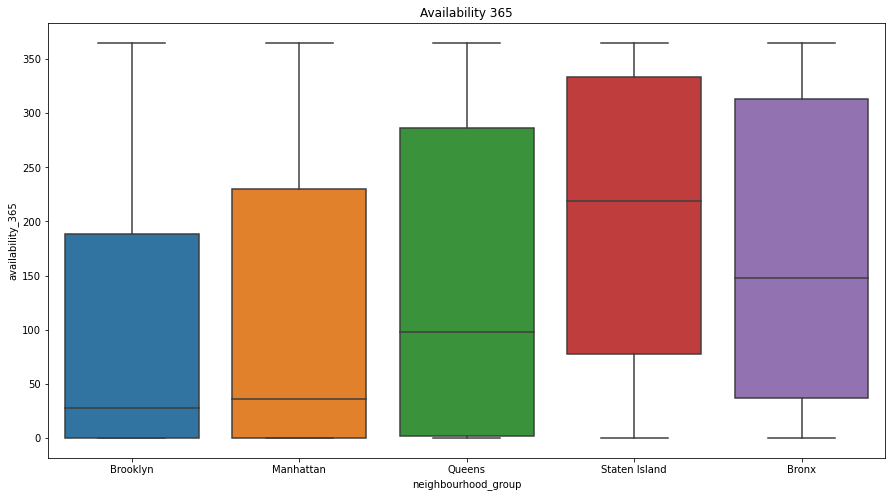

In [51]:
# let's see in a box plot
plt.figure(figsize=(15,8))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df)
plt.title('Availability 365')

In [82]:
# let's see the top 10 neighbourhood that have the highest number of reviews
most_reiwed_neighbours = df.groupby('neighbourhood').number_of_reviews.mean().sort_values(ascending=False).head(10)
most_reiwed_neighbours

neighbourhood
Silver Lake            118.500000
East Elmhurst           81.659459
Richmondtown            79.000000
Eltingville             76.000000
Mount Eden              70.000000
Springfield Gardens     69.094118
Tompkinsville           57.142857
Huguenot                55.666667
Manhattan Beach         50.625000
Highbridge              48.814815
Name: number_of_reviews, dtype: float64

Text(0.5, 1.0, 'Number of reviews')

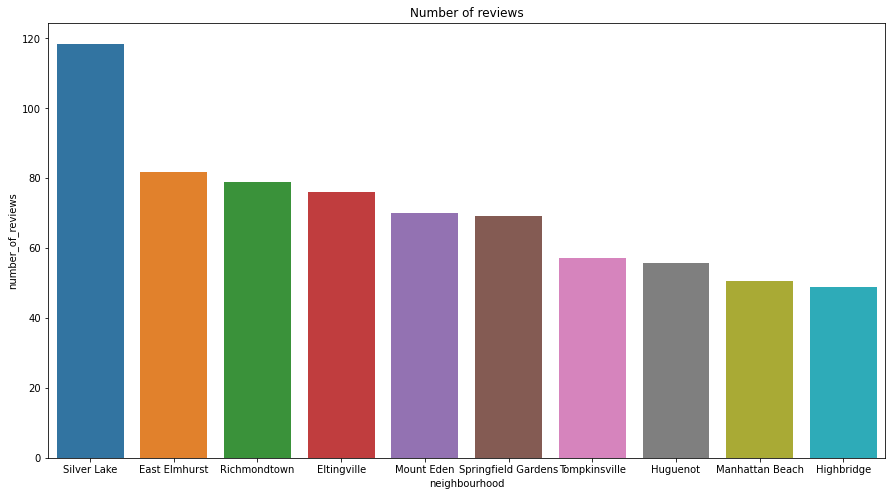

In [83]:
# let's see it in a plot 
plt.figure(figsize=(15,8))
sns.barplot(x=most_reiwed_neighbours.index, y=most_reiwed_neighbours)
plt.title('Number of reviews')

In [58]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [62]:
# which room_type has most price
df.groupby('room_type').price.mean().sort_values(ascending=False)

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

Text(0.5, 1.0, 'Price')

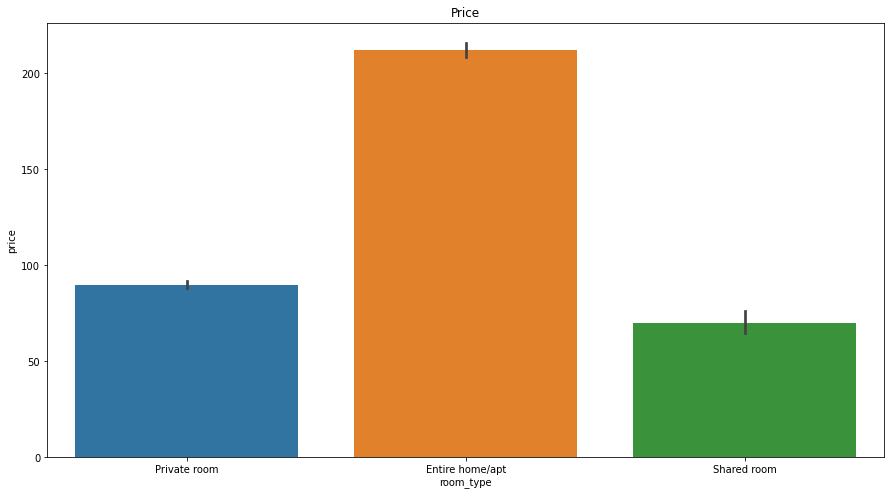

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.room_type, y=df.price)
plt.title('Price')

In [64]:
# let's see each neighbourhood_group in terms of price
df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

Text(0.5, 1.0, 'Price')

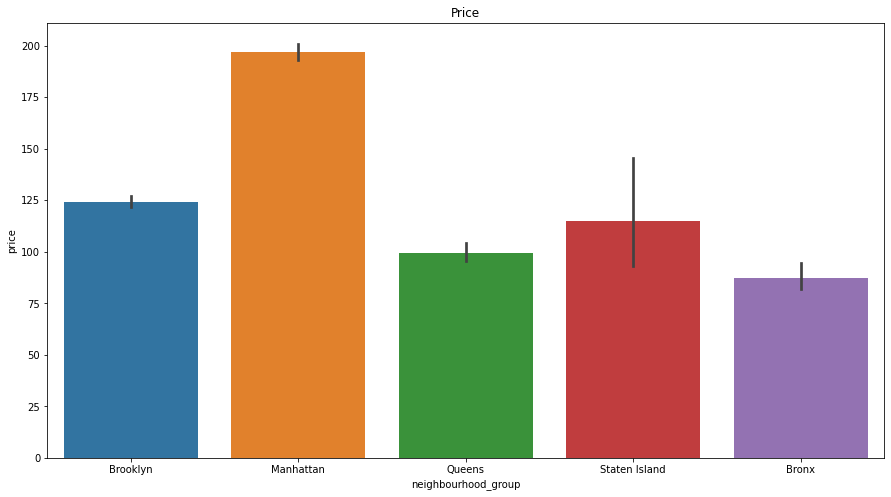

In [65]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.neighbourhood_group, y=df.price)
plt.title('Price')

Text(0.5, 1.0, 'Neighbourhood group Map')

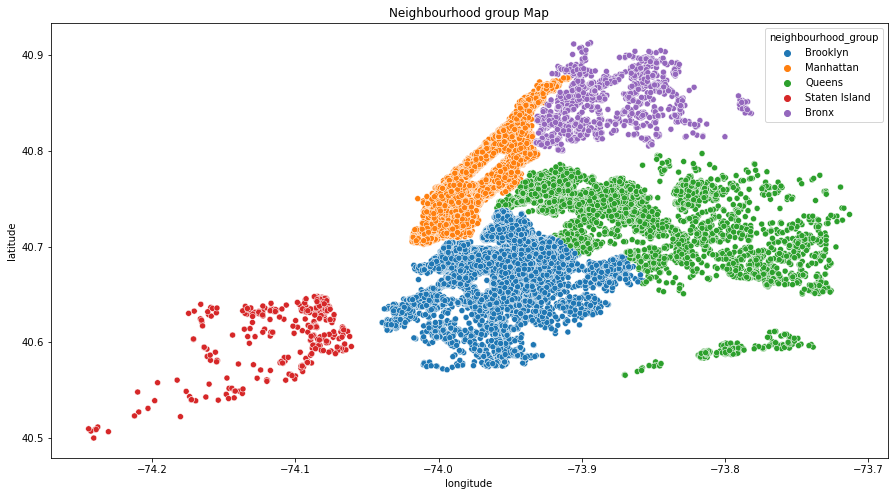

In [66]:
# Map of Neighbourhood group
plt.figure(figsize=(15,8))
sns.scatterplot(df.longitude,df.latitude, hue=df.neighbourhood_group)
plt.title('Neighbourhood group Map')


Text(0.5, 1.0, 'Room type Map')

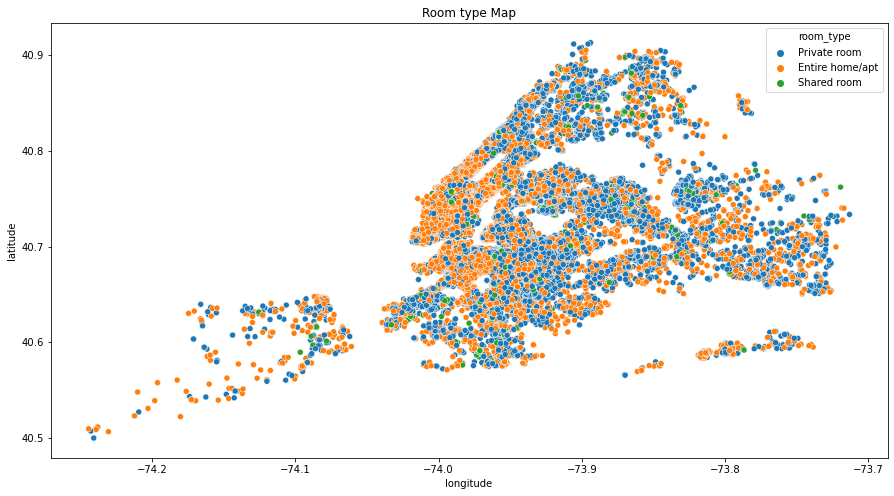

In [67]:
# Map of room_type
plt.figure(figsize=(15,8))
sns.scatterplot(df.longitude,df.latitude, hue=df.room_type)
plt.title('Room type Map')


In [68]:
# mow let's discover top_hosts
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [69]:
df.calculated_host_listings_count.max()

327

Text(0.5, 1.0, 'Top Hosts')

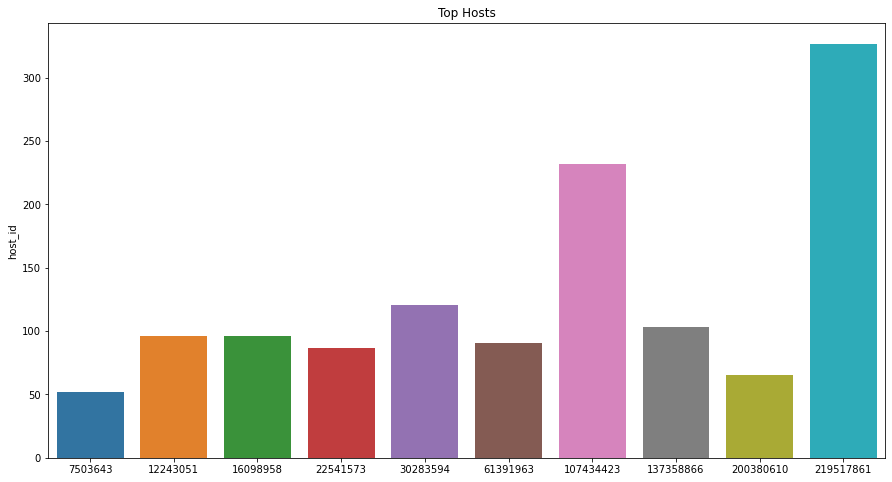

In [71]:
plt.figure(figsize=(15,8))
sns.barplot(x=top_host.index, y=top_host)
plt.title('Top Hosts')

Text(0.5, 1.0, 'Top Hosts Map')

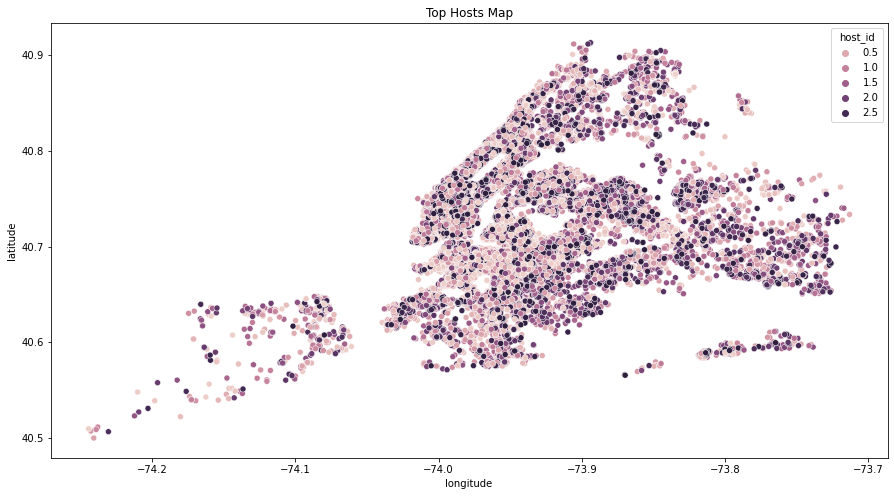

In [73]:
# let's see where the top host are located
plt.figure(figsize=(15,8))
sns.scatterplot(df.longitude,df.latitude, hue=df.host_id)
plt.title('Top Hosts Map')

In [74]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [75]:
df.groupby('neighbourhood_group').minimum_nights.mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        8.579151
Brooklyn         6.056556
Queens           5.181433
Staten Island    4.831099
Bronx            4.560953
Name: minimum_nights, dtype: float64

Text(0.5, 1.0, 'Minimum nights Number')

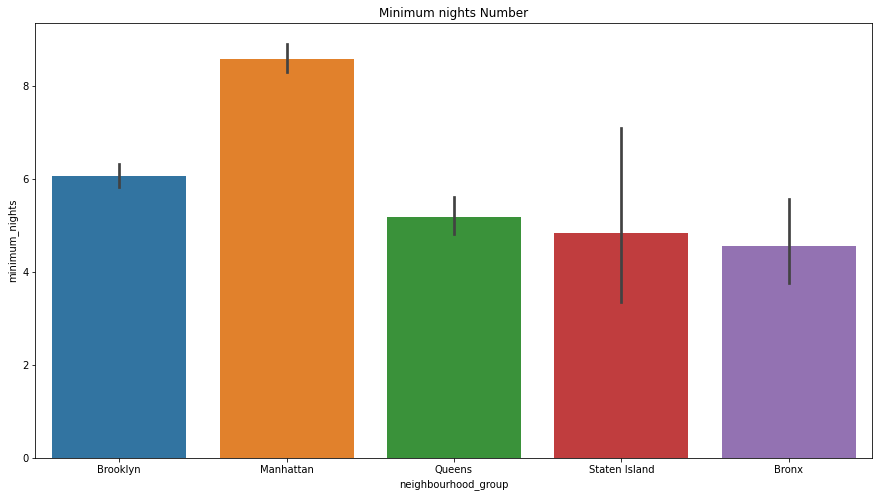

In [77]:
# let's see in a plot 
plt.figure(figsize=(15,8))
sns.barplot(x=df.neighbourhood_group, y=df.minimum_nights)
plt.title('Minimum nights Number')

### Conclusion
    This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found the most rated neighborhood_groups and it's (Manhattan); we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another and we found the most rated neighborhood was (East Elmhurst) and the least rated neighborhood was (Co-op City). Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings.. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more. Therefore, I hope this kernel helps everyone!

152.7206871868289